# Understanding the Concepts of Geometric Signal Representation

In [6]:
%load_ext tikzmagic

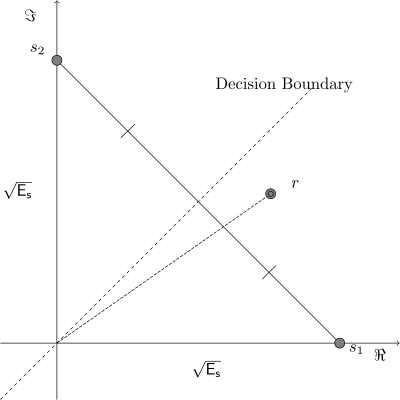

In [10]:
%%tikz -s 400,400 -sc 1.2 -f svg
\draw[->,color=black] (-1,0) -- (6.06,0);
\draw[->,color=black] (0,-1) -- (0,6.06);
\clip(-1,-1) rectangle (6.06,6.06);
\draw [dash pattern=on 2pt off 2pt] (-1,-1)-- (4.5,4.5);
\draw [dash pattern=on 2pt off .75pt] (0,0)-- (3.78,2.64);
\draw (0,5)-- (5,0);
\draw (1.38,3.87)-- (1.13,3.63);\draw (3.87,1.37)-- (3.63,1.13);
\draw (2.28,-0.2) node[anchor=north west] {$\sf\sqrt{E_s}$};
\draw (-1.06,2.96) node[anchor=north west] {$\sf\sqrt{E_s}$};
\draw (2.7,4.8) node[anchor=north west] { Decision Boundary};
\draw (-.68,6) node[anchor=north west] {$\Im$};
\draw (5.5,0.0) node[anchor=north west] {$\Re$};
\draw (5.06,0.08) node[anchor=north west] {${s_1}$};
\draw (-0.58,5.38) node[anchor=north west] {${s_2}$};
\draw (4.04,2.98) node[anchor=north west] {$r$};


\filldraw [fill=gray] (0,5) circle (2.5pt);
\filldraw [fill=gray] (5,0) circle (2.5pt);
\filldraw [fill=gray] (3.78,2.64) circle (2.5pt);
\filldraw [fill=gray] (3.78,2.64) circle (1.3pt);

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
from scipy.special import erfc
from numpy import *
from matplotlib import pyplot as plt

Signals representing 0 and 1 respectively

In [12]:
s_1 = 1 ; s_2 = 1j;

Look up table for the purpose of bit to complex mapping

In [13]:
s_lookup = array([s_1,s_2]);

Input set; $E_s\over N_0$ (gamma) values in dB

In [14]:
gamma_decibel = arange(-5, 11, 1);

In [ ]:
cases = len(gamma_decibel);

$N_0\over E_s$ value set. As $E_s = 1$, that value will be just $N_0$

In [15]:
N_0 = 10**((-0.1)*gamma_decibel);
N_0_MAT = tile(N_0,(10**5,1));

Generate an equi-probable random bit array of size $10^5$

In [17]:
bit_seq_MAT = random.randint(2,size=(10**5,cases));

Transmitted signal sequence

In [18]:
s_MAT = s_lookup[bit_seq_MAT];

Random complex noise

In [19]:
n_MAT = sqrt(N_0_MAT/2.)*(random.randn(10**5,cases)+1j*random.randn(10**5,cases));

Received signal sequence

In [21]:
r_MAT = s_MAT + n_MAT;

Decoded bit sequence at the receiver according to the decision rule:

$|r-s_1|<|r-s_2|$  $\rightarrow$  map $r$ to $s_1$ which is $0$

otherwise map $r$ to $s_2$ which is $1$

In [22]:
t_MAT = abs(r_MAT-s_2)<=abs(r_MAT-s_1);

Error occurs when an element of t(i.e. decoded bit sequence) is
not equal to corresponding element of bit_seq(i.e. transmitted bit
sequence). When there’s an error, the absolute difference of the
corresponding elements will be $1$. So:

In [23]:
error_bit_count = sum(abs(t_MAT-bit_seq_MAT),axis=0);

Saving bit error rate values

In [24]:
ber = error_bit_count/10.**5

Calculating $E_s\over N_0$ values which is gamma. ($E_s=1$)

In [25]:
gamma_ = (1./N_0);


Define Q-function $Q(x)=\frac{1}{2}erfc\left(\frac{x}{\sqrt{2}}\right)$

In [27]:
qfunc = lambda x:.5*erfc(x/sqrt(2))

Calculate $Q\left(\sqrt{\frac{E_s}{N_0}}\right)$

In [28]:
q = qfunc(sqrt(gamma_));

Plotting the graphs in log scale

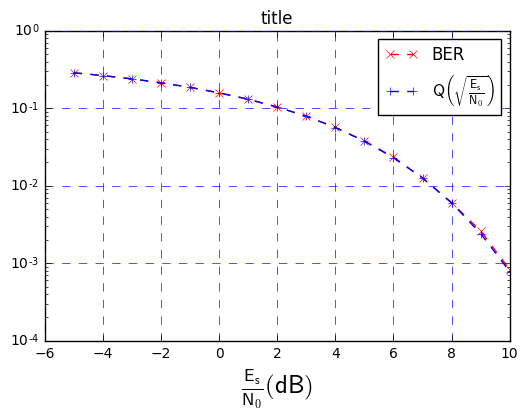

In [30]:
fig, ax = plt.subplots()
ax.semilogy(gamma_decibel,ber, label='BER',marker='x',c='r',ls='dashed')
ax.semilogy(gamma_decibel,q, label=r'$\sf Q\left(\sqrt{\frac{E_s}{N_0}}\right)$',marker='+',ls='dashed')
ax.legend(loc=0) # upper left corner
ax.set_xlabel(r'$\sf\frac{E_s}{N_0}(dB)$', fontsize=18)
ax.set_title('title');
ax.grid(color='b', alpha=9, linestyle='dashed', linewidth=0.5)